## Load data and Preprocessing data

In [1]:
from google.colab import drive
drive.mount("/drive")
import pandas as pd
from numpy import nan

Mounted at /drive


In [2]:
data = pd.read_csv("/drive/My Drive/Colab Notebooks/data/IST 736 projects/myslice/myslice-statisfied and feedback.csv")
corpus = data['myslice.feedback'].tolist()
print(corpus)
#drop NA values in corpus
corpus=[item for item in corpus if not(pd.isnull(item)) == True]
print(corpus)

['Clearer directions, help contact information, and info in Answers would be helpful', 'Can be difficult to navigate when trying to find something in employee resources', 'The platform switch to icons rather than headers and list has made it difficult to quickly find the information you are looking for.  Now it is more of a click and hunt for link rather than being able to read through a list of links.  In addition I have had to click on links such as in timesheet approvals, faculty advising and employee services to get a page to load.  Many times I just get kicked out and this has happened across different browsers and computer types.', "I'd really like the option to set the default page of MySlice to the Employee view. I am not a student and do not often need to look at the student information.", 'I do not find Myslice as intuitive to use as it was in the past.', 'I started teaching a class as an adjunct this semester, so Blackboard was definitely a learning curve, as figuring out so

In [3]:
#print size in corpus
print('size of feedback is', len(corpus))

size of feedback is 480


# set up my stop word

In [4]:
my_stopwords=frozenset(['might', 'take', 'ourselves', 'by', 'everything', 'therein', 'twenty', 'others', 'keep', 'ever', 'my', 'been', 'top',  'via', 'are', 'onto', 'would', 'most', 'rather', 'except', 'should', 'per', 'wherein', 'third', 'yourselves', 'nine', 'is', 'namely', 'besides',  'down', 'anyone', 'within', 'latter', 'whose', 'bill', 'throughout', 'until', 'former', 'anything', 'i', 'call', 'thru', 'put', 'see', 'meanwhile', 'very', 'whoever', 'somehow', 'she', 'hereby', 'beside', 'full', 'then', 'something', 'whether', 'can', 'me', 'wherever', 'yours', 'towards', 'together', 'upon', 'name', 'again', 'therefore', 'alone', 'between', 'whom', 'the', 'interest', 'done', 'hereupon', 'them', 'than', 'con', 'eg', 'these', 'becoming', 'much', 'beforehand', 'under', 'too', 'another', 'whither', 'ie', 'un', 'and', 'above', 'amongst', 'across', 'moreover', 'own', 'both', 'other', 'hers', 'find', 'was', 'an', 'many', 'de', 'indeed', 'three', 'twelve', 'serious', 'otherwise', 'thick', 'latterly', 'they', 'thin', 'whatever', 'how', 'same', 'anyway', 'once', 'herself', 'will', 'well', 'give', 'being', 'thereafter', 'seemed', 'sometimes', 'up', 'empty', 'fifteen', 'thereupon', 'where', 'co', 'from', 'whereas', 'over', 'am', 'itself', 'somewhere', 'along', 'which', 'forty', 'also', 'as', 'for', 'amoungst', 'after', 'of', 'back', 'thereby', 'it', 'detail', 'front', 're', 'us', 'five', 'such', 'whole', 'almost', 'made', 'their', 'mine', 'at', 'may', 'sixty', 'before', 'must', 'everywhere', 'amount', 'first', 'already', 'etc', 'eight', 'through', 'perhaps', 'several', 'that', 'mill', 'more', 'whence', 'due', 'each', 'themselves', 'become', 'seems', 'cry', 'into', 'still', 'your', 'why', 'sometime', 'some', 'whenever', 'please', 'neither', 'because', 'herein', 'has', 'this', 'among', 'during', 'when', 'one', 'there', 'ltd', 'hence', 'becomes', 'whereby', 'inc', 'everyone', 'last', 'against', 'out', 'he', 'move', 'all', 'now', 'either', 'bottom', 'nevertheless', 'fifty', 'side', 'hundred', 'his', 'so', 'else', 'or', 'were', 'you', 'further', 'yet', 'here', 'had', 'beyond', 'if', 'part', 'below', 'who', 'be', 'around', 'someone', 'whereupon', 'behind', 'seem', 'ten', 'enough', 'four', 'about', 'in', 'off', 'though', 'since', 'elsewhere', 'anywhere', 'myself', 'sincere', 'hereafter', 'system', 'on', 'ours', 'could', 'with', 'seeming', 'get', 'thence', 'two', 'always', 'toward', 'a', 'yourself', 'do', 'himself', 'her', 'next', 'have', 'mostly', 'formerly', 'we', 'eleven', 'found', 'whereafter', 'anyhow', 'became', 'thus', 'what', 'fire', 'describe', 'him', 'those', 'to', 'afterwards', 'even', 'every', 'fill',  'often', 'its', 'our', 'show', 'go', 'six'])
print(len(my_stopwords))

295


In [5]:
added_stopwords = frozenset(['Myslice', 'myslice'])
my_stopwords =my_stopwords.union(added_stopwords)

In [6]:
print(len(my_stopwords))
print(my_stopwords)

297
frozenset({'whereupon', 'about', 'via', 'yours', 'next', 'some', 'nevertheless', 'always', 'whereby', 'beside', 'name', 'thick', 'is', 'though', 'call', 'themselves', 'his', 'can', 'before', 'seems', 'all', 'the', 'each', 'have', 'system', 'who', 'Myslice', 'many', 'six', 'from', 'herself', 'latterly', 'be', 'seemed', 'bottom', 'again', 'made', 'detail', 'during', 'whereafter', 'amount', 'against', 'please', 'already', 'herein', 'ltd', 'become', 'interest', 'whereas', 're', 'whence', 'fifty', 'so', 'its', 'amoungst', 'first', 'there', 'nine', 'etc', 'within', 'you', 'side', 'because', 'beyond', 'toward', 'top', 'sixty', 'thus', 'somewhere', 'those', 'thence', 'everyone', 'anyway', 'across', 'neither', 'becoming', 'more', 'four', 'others', 'it', 'after', 'still', 'their', 'this', 'someone', 'over', 'must', 'enough', 'empty', 'since', 'see', 'fire', 'eleven', 'put', 'therein', 'full', 'if', 'anyhow', 'below', 'too', 'five', 'should', 'i', 'an', 'anything', 'in', 'throughout', 'due', 

# KMeans


tfidf representation

In [7]:
# tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95,min_df=2,encoding='latin-1', binary=False)
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

958


In [72]:
from sklearn.cluster import KMeans
K = 10
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

In [9]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [11]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

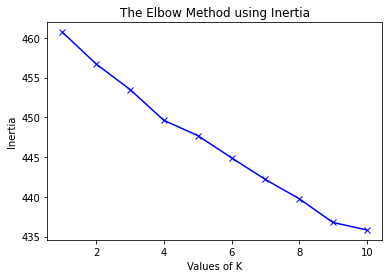

In [74]:
elbow(10, tfidf)

In [37]:
from sklearn.cluster import KMeans
K = 9
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

In [38]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [39]:
print_cluster_sizes(tfidf_model)

{8: 54, 7: 63, 4: 133, 5: 35, 2: 91, 0: 25, 3: 51, 1: 24, 6: 4}


In [40]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [41]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0
Basic 
N
 
The HR section of MySlice is quite confusing.
I like the new design of MySlice, the only issue I have experienced is in the HR/Payroll Approvals section. If I click on something on the page when it is apparently not fully loaded, I get kicked out of the system. It happens too often.


======cluster # 1
Basic 
 
N
The new MySlice has been problematic since the day it was implemented. It's not clear who I would go to for help. MySlice regularly denies me access to certain areas and tells me to log out or that I have a "stale request." Even when I log out and restart my computer, it gives me the same error message. To approve payroll, it can take me half an hour of trying to get MySlice to allow me access before I can get to the appropriate screen without being told to log off or that I have a stale request. Frustrating. Also, Orange Success and DegreeWorks work well but the Navigator function is hard to manuever and I can't find anything. That area needs so

unigram representation

In [30]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False,analyzer= 'word', token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'", min_df=2, stop_words=my_stopwords)
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

793


In [64]:
from sklearn.cluster import KMeans

K = 10
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

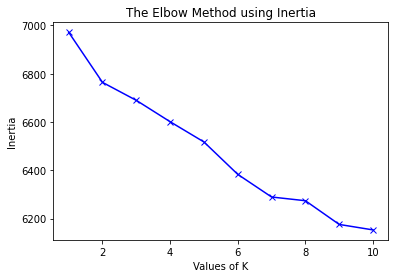

In [65]:
elbow(10, uni)

In [66]:
print_cluster_sizes(uni_model)

{2: 397, 0: 43, 5: 33, 4: 1, 8: 1, 9: 1, 6: 1, 1: 1, 7: 1, 3: 1}


In [68]:
from sklearn.cluster import KMeans

K = 8
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

In [69]:
print_docs_closest_to_centroids(uni_model, uni, 3)



======cluster # 0
MySlice seems fine to me.
None
 


======cluster # 1
none
None
 


======cluster # 2
I am able to use and navigate MySlice adequately for my purposes. That said, it is frustratingly slow to load pages to look up data especially looking up PeopleSoft/HRSA content. I also find that I am not able to use concurrent PeopleSoft/HRSA tabs- each with different content- on my browser to compare the different PS content areas and take advantage of multiple monitors. Multiple tabs revert to the last open tab. Also, MySlice content is organized by tiles within tabs; as an applicant/employee/student there's a ton of overlap across the 3 separate pages for each of my roles yet it's not clear how much commonality there is underneath each tile in each role. For efficiency, can't we have one page with all tiles?
I use MySlice multiple times a day to access the campus resources I use most.
I do not find Myslice as intuitive to use as it was in the past.


======cluster # 3
I find the

# LDA


In [36]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tf-idf representation

In [43]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

774


In [44]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 9

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tfidf)

In [45]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
check tile usage significant myslice
Topic 1:
helpful needs program organized great
Topic 2:
comment trouble clunky don ui
Topic 3:
myslice things navigate new like
Topic 4:
user friendly interface better intuitive
Topic 5:
experience help sure myslice frequently
Topic 6:
myslice work need difficult use
Topic 7:
works communication myslice platform function
Topic 8:
myslice use hard understand need


In [46]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities
# lda_z stores the prob distribution for each document

print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(480, 9)
[0.03089177 0.03091595 0.03088955 0.0309093  0.03091463 0.75279586
 0.03089909 0.03089104 0.03089281]


Unigram representation

In [47]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

1782


In [48]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 8

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(uni)

In [50]:
no_top_words = 5
display_topics(lda, uni_feature_names, no_top_words)

Topic 0:
coworkers issue info phone features
Topic 1:
myslice use information need like
Topic 2:
directory just employees significant logged
Topic 3:
available class resources blackboard seats
Topic 4:
hours google wide works gdot
Topic 5:
comment problems cas resolves connectivity
Topic 6:
icons myslice day difficult payroll
Topic 7:
myslice better helpful time usage


In [51]:
print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(480, 8)
[0.01390324 0.90273956 0.01388991 0.01389461 0.01389009 0.01389101
 0.01389266 0.01389892]


# BERTopic

In [52]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
# obtain topic modelling results
print(len(corpus))

from bertopic import BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(corpus)

480


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2022-12-14 02:25:09,230 - BERTopic - Transformed documents to Embeddings
2022-12-14 02:25:15,746 - BERTopic - Reduced dimensionality
2022-12-14 02:25:15,783 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

8


,Topic,Count,Name
0,-1,96,-1_the_to_and_it
1,0,117,0_myslice_to_the_is
2,1,96,1_the_it_to_is
3,2,48,2_to_the_student_it
4,3,33,3_to_time_the_and
5,4,29,4_to_the_it_you
6,5,28,5_updates_changes_communication_not
7,6,20,6_it_to_in_you


In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['MySlice is not intuitive or user-friendly', 'sometimes it is hard to find an item in myslice', 'It can be difficult to find things. I wish it content within Myslice could be bookmarked. Maybe it can and I just dont know how to do that!']

== Representative documents in cluster # 1
['The icon-based arrangement is entirely unhelpful. I have to click through every menu to find what I need.', "The tile interface is completely confusing - I don't know where to find anything that I'm looking for", 'Ugly and archaic interface. How to find specifics can be difficult at times.']

== Representative documents in cluster # 2
['It wasn\'t clear to me that I\'d need to go to the faculty/advisors tab of myslice in order to access a list of my students with their pictures and email addresses.  It\'s pretty common to need to access that information so it should be pretty obvious where to find it.  Maybe rename the tab to "Instructor/Advisor Resources" to ma

In [ ]:
topic_model.visualize_topics()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
topic_model.visualize_distribution(probs[2], min_probability=0.005)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

# SBERT


In [55]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [57]:
sbert_embeddings = embedder.encode(corpus)

In [58]:
K = 9  # the number of clusters
from sklearn.cluster import KMeans
sbert_model = KMeans(n_clusters=K, random_state=1337)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [59]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)
print_cluster_sizes(sbert_model)

{3: 27, 8: 58, 1: 52, 7: 51, 2: 110, 0: 49, 5: 53, 6: 53, 4: 27}


In [60]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 3)



======cluster # 0
Clunky especially the new interface. I waste too much time trying to find what I need.
User friendly. I like the interface. 
The not-so-new interface is an inconvenient mess. Way worse than the previous arrangement.


======cluster # 1
Some stuff that used to be easy to find is now buried in a sub-menu somewhere since the changes to the interface.
It's not particularly intuitive to navigate. I have learned to find the things I often use but struggle to find items that I need less frequently. 
I am not always 100 percent clear on where to find things not directly listed on the main menu. One solution could be to communicate what each main item includes either with a short description underneath or mouse over. 


======cluster # 2
MySlice, as of its recent changes, has become more confusing and difficult to navigate.
MySlice is an awful user interface with many issues.   It is the first user experience a new community member uses and really puts a bad taste in your mo